# Motive is to :
1) Observe properties of different stocks from same/different sectors (histogram, qqplot, 95% CI width)

2) Prove weak stationarity of the stocks (mean, variance, and ACF correlogram)

3) Provide moving window avg and volatility (by 42, 252 window) as well as displaying examples of dual moving average crossover technique 

4) Applicaton of Technical Indicators to forecast price trends:
   
   4.1) Commodity Channel Index (CCI)

## 1)

In [1]:
# Import necessary packages
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import datetime
import numpy as np

# package required for QQ plot
import scipy.stats as stats

In [2]:
# Period of stock data comparison ( economy crisis 2008 in specific)
start_date = '2007-01-01'
end_date = '2010-12-31'

#Stocks from Healthcare sector, Health Care Equipment sub industry
#(ABT) stock symbol of a healthcare sector in SP500 that has been through the 2008 recession
#(ABMD) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison
#(A) another stock symbol of a healthcare sector in SP500 that has been through the 2008 recession for comparison

#Stocks from Material sector
#(GLD) a stock symbol of material sector

ABT =data.DataReader('ABT', 'yahoo', start_date, end_date)
ABMD =data.DataReader('ABMD', 'yahoo', start_date, end_date)
A =data.DataReader('A', 'yahoo', start_date, end_date)
GLD =data.DataReader('GLD', 'yahoo', start_date, end_date)

In [3]:
# Concatenate stock symbols datas with matching dates
symbol_data=[ABT, ABMD, A, GLD]
symbols=['ABT', 'ABMD', 'A', 'GLD']
all_data=pd.concat(symbol_data, keys=symbols, names=['Symbol','Date'])

In [4]:
# Displays first few data of stock(should be data of ABT since it is the first in the symbol list )
all_data.head()

High        Low       Open      Close      Volume  \
Symbol Date                                                                 
ABT    2007-01-03  23.745302  23.390249  23.428635  23.495806  11214800.0   
       2007-01-04  24.105152  23.495806  23.538988  23.942020  21185400.0   
       2007-01-05  23.990000  23.639746  23.942020  23.942020  14649800.0   
       2007-01-08  24.052374  23.817272  23.903637  24.028383  12734600.0   
       2007-01-09  24.306667  23.990000  24.061970  24.239496  16969100.0   

                   Adj Close  
Symbol Date                   
ABT    2007-01-03  13.849581  
       2007-01-04  14.112598  
       2007-01-05  14.112598  
       2007-01-08  14.163504  
       2007-01-09  14.287942

In [5]:
# Displays last few data of stock(should be data of GLD since it is the last in the symbol list )
all_data.tail()

High         Low        Open       Close      Volume  \
Symbol Date                                                                     
GLD    2010-12-27  135.059998  134.490005  134.960007  135.020004   3436400.0   
       2010-12-28  137.339996  136.619995  136.850006  137.220001  10111800.0   
       2010-12-29  138.050003  137.190002  137.380005  137.710007   8442300.0   
       2010-12-30  137.710007  136.940002  137.580002  137.029999   5749400.0   
       2010-12-31  138.770004  137.720001  137.779999  138.720001   9219800.0   

                    Adj Close  
Symbol Date                    
GLD    2010-12-27  135.020004  
       2010-12-28  137.220001  
       2010-12-29  137.710007  
       2010-12-30  137.029999  
       2010-12-31  138.720001

In [6]:
# Reset index to contain only adj. close price of each stock
all_data_adj_price= all_data[['Adj Close']].reset_index()
all_data_pivoting= all_data_adj_price.pivot('Date', 'Symbol', 'Adj Close')

In [7]:
# Displays first few adj. close price data of all stocks
all_data_pivoting.head()

Symbol,A,ABMD,ABT,GLD
Date,,,,
2007-01-03,22.499685,14.05,13.849581,62.279999
2007-01-04,22.571835,14.35,14.112598,61.650002
2007-01-05,22.361929,14.14,14.112598,60.169998
2007-01-08,22.283213,14.11,14.163504,60.480000
2007-01-09,22.309454,13.96,14.287942,60.849998


In [8]:
# Displays last few adj. close price data of all stocks
all_data_pivoting.tail()

Symbol,A,ABMD,ABT,GLD
Date,,,,
2010-12-27,27.498152,9.75,17.072138,135.020004
2010-12-28,27.229210,9.77,17.075739,137.220001
2010-12-29,27.347282,9.85,17.086548,137.710007
2010-12-30,27.281685,9.71,17.140596,137.029999
2010-12-31,27.176731,9.61,17.263113,138.720001


Text(0.5, 1.0, 'Stock price fluctuation of the listed 4 stocks')

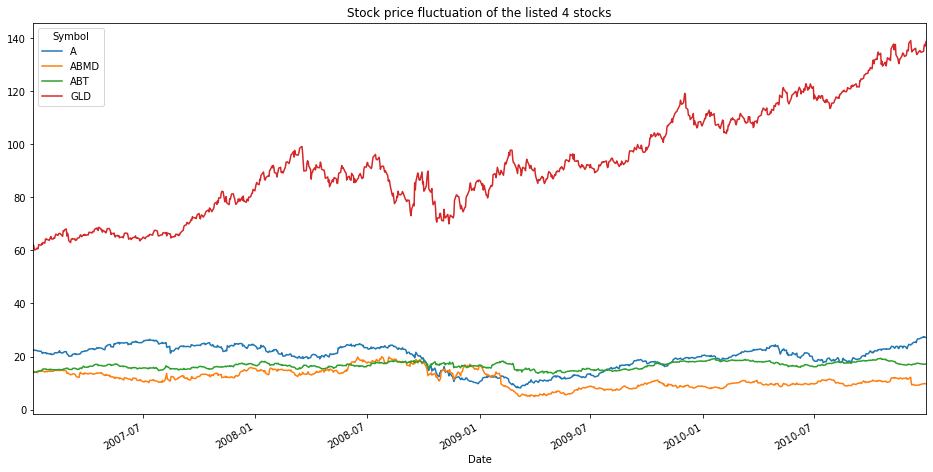

In [9]:
# Plot price of stock throughout the years
all_data_pivoting.plot(figsize=(16,8))
plt.title('Stock price fluctuation of the listed 4 stocks')

Text(0.5, 1.0, 'Trading volume of GLD')

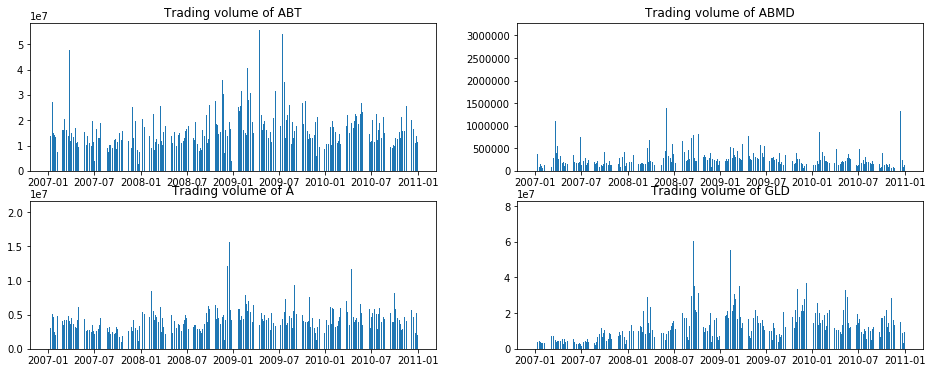

In [10]:
# Observe traded volume of stocks 
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_volume= all_data.Volume.loc['ABT']
plt.bar(ABT_volume.index, ABT_volume)
plt.title('Trading volume of ABT')

plt.subplot(2,2,2)
ABMD_volume= all_data.Volume.loc['ABMD']
plt.bar(ABMD_volume.index, ABMD_volume)
plt.title('Trading volume of ABMD')

plt.subplot(2,2,3)
A_volume= all_data.Volume.loc['A']
plt.bar(A_volume.index, A_volume)
plt.title('Trading volume of A')

plt.subplot(2,2,4)
GLD_volume= all_data.Volume.loc['GLD']
plt.bar(GLD_volume.index, GLD_volume)
plt.title('Trading volume of GLD')

# Conclusion
# ABMD trading volume is least among all stock(10^6) , stock less liquid compared to other 3 stocks(10^7)

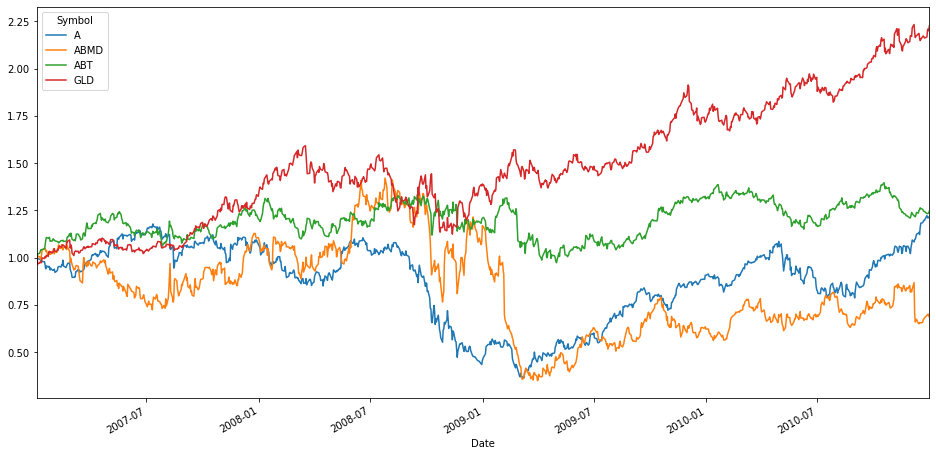

In [11]:
# % change in stock price daily in terms of cumulative returns
daily_price_change= all_data_pivoting.pct_change()
daily_price_change.fillna(0, inplace=True)
daily_cum_return= (1 + daily_price_change).cumprod()
daily_cum_return.plot(figsize=(16,8))

# Conclusion
# ABMD returns seemed to be fluctuating the most, implying higher volatility

Text(0.5, 1.0, 'Histograme of GLD returns')

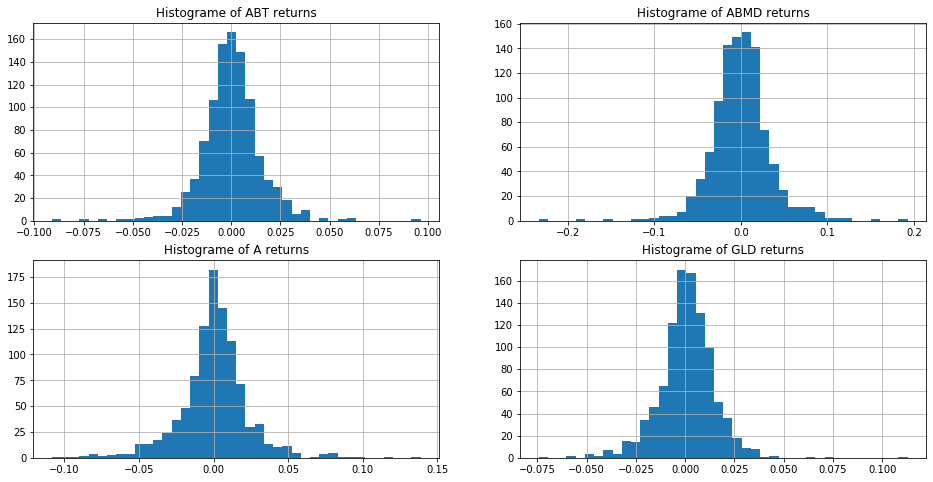

In [12]:
# Plot of histogram of returns(% price change)
ABT_pct_change= daily_price_change['ABT']
ABMD_pct_change= daily_price_change['ABMD']
A_pct_change= daily_price_change['A']
GLD_pct_change= daily_price_change['GLD']

plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
ABT_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABT returns')

plt.subplot(2,2,2)
ABMD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of ABMD returns')

plt.subplot(2,2,3)
A_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of A returns')

plt.subplot(2,2,4)
GLD_pct_change.hist(bins=40, figsize=(16,8))
plt.title('Histograme of GLD returns')

# Conclusion
# All stock retrns seem normally distribution with mean being approx 0
# Histogram of ABMD has the widest interval, thus considered being more volatile
# Histogram of ABMD has the second widest interval after ABMD
# Histogram of ABt and GLD seem to have approx similar widths, both having smallest width of all four histogram
# This can confirmed by observing 95% CI of stock returns

In [13]:
# Basic description of ABT(% price change)
ABT_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABT is (-0.026315, 0.029186)
# Width of CI is 0.055501 (first ranking(smallest) width, better precision)

count    1008.000000
mean        0.000326
std         0.014684
min        -0.091156
2.5%       -0.026315
50%         0.000000
97.5%       0.029397
max         0.096259
Name: ABT, dtype: float64

In [14]:
# Basic description of ABMD(% price change)
ABMD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of ABMD is (-0.060533, 0.075146)
# Width of CI is 0.135679 (fourth ranking in width)

count    1008.000000
mean        0.000196
std         0.033747
min        -0.233776
2.5%       -0.060533
50%         0.000000
97.5%       0.075146
max         0.192876
Name: ABMD, dtype: float64

In [15]:
# Basic description of A(% price change)
A_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of A is (-0.050396, 0.049332)
# Width of CI is 0.099728 (third ranking in width)

count    1008.000000
mean        0.000470
std         0.023805
min        -0.108450
2.5%       -0.050396
50%         0.000854
97.5%       0.049331
max         0.138790
Name: A, dtype: float64

In [16]:
# Basic description of GLD(% price change)
GLD_pct_change.describe(percentiles=(0.025, 0.975))
# 95% CI of GLD is (-0.029987, 0.027157)
# Width of CI is 0.057144 (second ranking width)

count    1008.000000
mean        0.000898
std         0.014393
min        -0.074305
2.5%       -0.029987
50%         0.001144
97.5%       0.027157
max         0.112905
Name: GLD, dtype: float64

<Figure size 432x288 with 0 Axes>

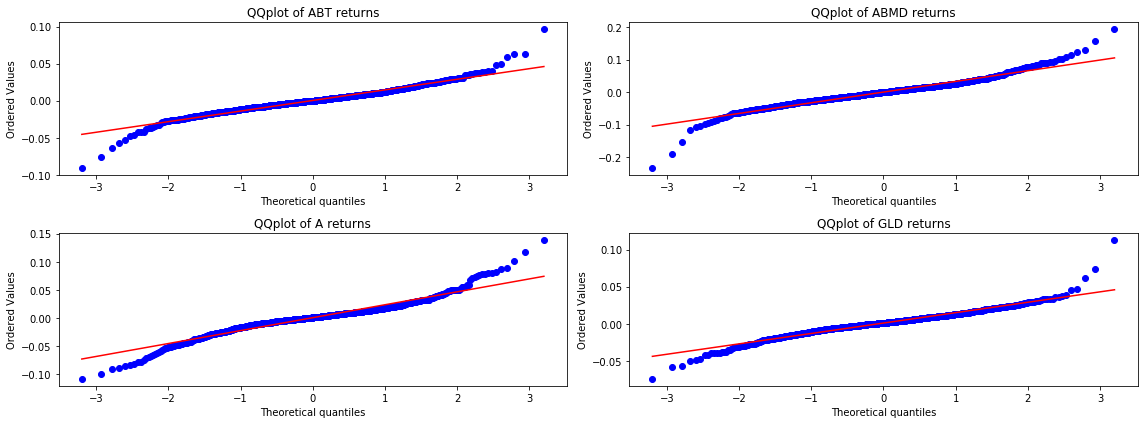

In [17]:
#Plot QQ plot of stocks
plt.clf()
plt.figure(figsize=(16,6))
ax=plt.subplot(2,2,1)
stats.probplot(ABT_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABT returns')

ax=plt.subplot(2,2,2)
stats.probplot(ABMD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of ABMD returns')

ax=plt.subplot(2,2,3)
stats.probplot(A_pct_change, dist='norm', plot=ax)
plt.title('QQplot of A returns')

ax=plt.subplot(2,2,4)
stats.probplot(GLD_pct_change, dist='norm', plot=ax)
plt.title('QQplot of GLD returns')
plt.tight_layout()

## 2)

In [18]:
# Prove that all 4 stocks exhibit weak stationary property
# % price change splitted into 3 intervals where mean and variance of each interval is compared
# stock sequence in 'ABT', 'ABMD', 'A', 'GLD'
for tick in symbols:
    x=daily_price_change[tick].values
    one_third_datapoint=round(len(x)/3)
    two_third_datapoint=(one_third_datapoint*2)

    data1, data2, data3=x[0:one_third_datapoint], x[one_third_datapoint:two_third_datapoint], x[two_third_datapoint:] 
    mean1, mean2, mean3=data1.mean(), data2.mean(), data3.mean()
    var1, var2, var3=data1.var(), data2.var(), data3.var()
    print(tick)
    print('mean1')
    print(mean1)
    print('mean2')
    print(mean2)
    print('mean3')
    print(mean3)

    print('var1')
    print(var1)
    print('var2')
    print(var2)
    print('var3')
    print(var3)
    print('\n')

    # mean and variace of stocks seem to remain vary within small range only
    # weak stationarity not certain until ACF correlogram seen

ABT
mean1
0.0005495731704969304
mean2
-4.991570102109889e-05
mean3
0.00047937280369885355
var1
0.0001636609984855118
var2
0.0003942821578786141
var3
8.805178759777232e-05


ABMD
mean1
0.0006815406892881781
mean2
-0.0010126533109207146
mean3
0.0009183740281931075
var1
0.0008584832952317249
var2
0.001842035663208667
var3
0.0007104856293265199


A
mean1
-4.8290169931985916e-05
mean2
-0.00011512220736981567
mean3
0.0015748784210535347
var1
0.0003013624573289171
var2
0.0010550354777596953
var3
0.0003400725007504077


GLD
mean1
0.0009868733446160433
mean2
0.0004862929597928179
mean3
0.0012211147922458249
var1
0.00015063844126052115
var2
0.00035216591759834197
var3
0.00011773044951462082




<Figure size 432x288 with 0 Axes>

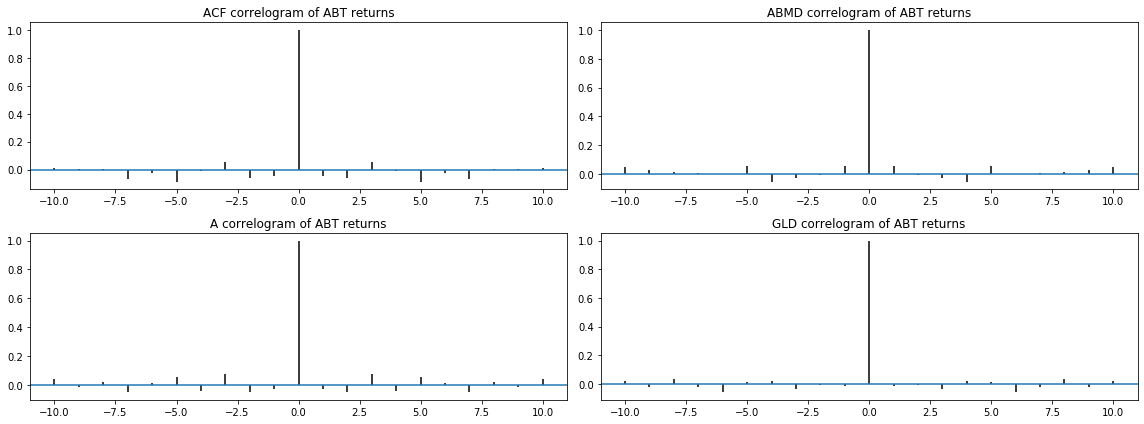

In [19]:
# Plot ACF correlogram to determine if stock exhibit weak stationarity 
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
plt.acorr(daily_price_change['ABT'])
plt.title('ACF correlogram of ABT returns')

plt.subplot(2,2,2)
plt.acorr(daily_price_change['ABMD'])
plt.title('ABMD correlogram of ABT returns')

plt.subplot(2,2,3)
plt.acorr(daily_price_change['A'])
plt.title('A correlogram of ABT returns')

plt.subplot(2,2,4)
plt.acorr(daily_price_change['GLD'])
plt.title('GLD correlogram of ABT returns')
plt.tight_layout()

# ACF decreases quickly for all stocks
# This implies that the  stocks have weak stationarity

## 3)

<Figure size 432x288 with 0 Axes>

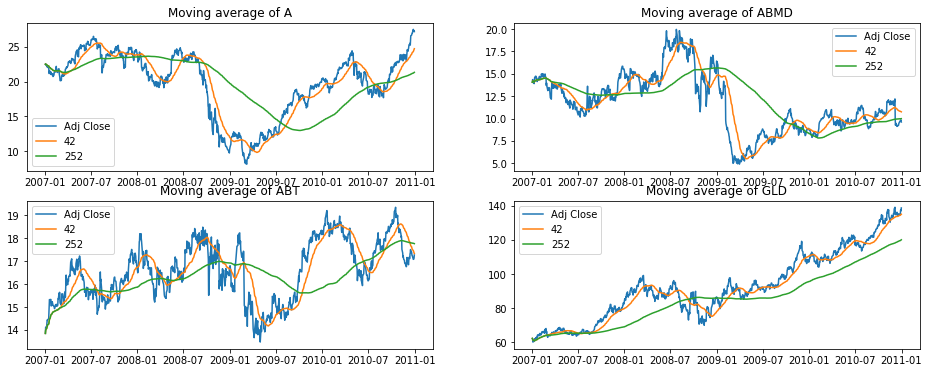

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot moving average for windows=42, 252 for each stock
# which can then be used to display plots of dual moving average crossover technique in next plot

data_mvg_avg_42=all_data_pivoting.rolling(window=42, min_periods=1, center=False).mean()
data_mvg_avg_252=all_data_pivoting.rolling(window=252, min_periods=1, center=False).mean()

plt.clf()
plt.figure(figsize=(16,6))

for i in range(1,len(symbols)+1):
    plt.subplot(2,2,i)

    all_data_pivoting['42']=data_mvg_avg_42.iloc[:,i-1]
    all_data_pivoting['252']=data_mvg_avg_252.iloc[:,i-1]
    plt.plot(all_data_pivoting.iloc[:,i-1])
    plt.plot(all_data_pivoting['42'])
    plt.plot(all_data_pivoting['252'])
    plt.title('Moving average of {}'.format(all_data_pivoting.columns[i-1]))
    plt.legend(labels=['Adj Close', '42', '252'], loc=0)
    del all_data_pivoting['42']
    del all_data_pivoting['252']
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

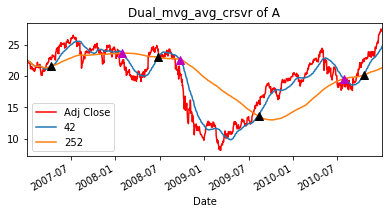

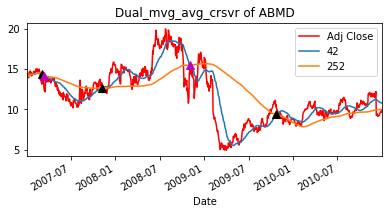

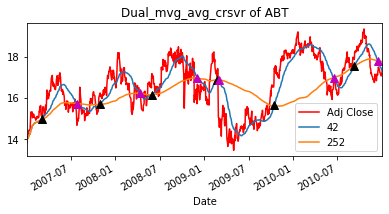

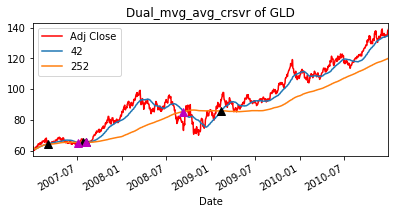

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot of dual moving average crossover technique example

# signal 'indicator' either being 1 for short_mvg_avg >long_mvg_avg 
# or 0 for otherwise

# signal 'decision' either being 1 for long stock, 
# -1 for short stock,
# or 0 for no action

signal=pd.DataFrame(index=all_data_pivoting.index)

plt.clf()

for i in range(len(symbols)):
    signal['indicator']=0.0
    signal['decision']=0.0
    
    signal['short_mvg_avg']=data_mvg_avg_42.iloc[:,i]
    signal['long_mvg_avg']=data_mvg_avg_252.iloc[:,i]
    signal['indicator'][42:]=np.where(signal['short_mvg_avg'][42:]
                                      >signal['long_mvg_avg'][42:],1.0,0.0)
    signal['decision']=signal['indicator'].diff()
    
    subplot_value=int(220+(i+1))
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(subplot_value)

    all_data_pivoting.iloc[:,i].plot(ax=ax1, color='r')
    signal['short_mvg_avg'].plot(ax=ax1, lw=1.5)
    signal['long_mvg_avg'].plot(ax=ax1, lw=1.5)
    #plt.plot(signal['long_mvg_avg'])
    plt.title('Dual_mvg_avg_crsvr of {}'.format(all_data_pivoting.columns[i]))
    plt.legend(labels=['Adj Close', '42', '252'], loc=0)
    
    # plot black tri indicator to long stock
    ax1.plot(signal.loc[signal.decision == 1.0].index, 
             signal.short_mvg_avg[signal.decision == 1.0], '^', markersize=8, color='k')
    
    # plot purple tri indicator to short stock
    ax1.plot(signal.loc[signal.decision == -1.0].index, 
             signal.short_mvg_avg[signal.decision == -1.0], '^', markersize=8, color='m')


plt.show()
plt.tight_layout()

## 4)

### 4.1) Commodity Channel Index (CCI)

In [22]:
# Examples of Commodity Channel Index based on 20 day mvg_avg
# Often used to identify cyclical turns across asset classes
# Formula being:
#   avg_price= (High + Low + Close)/3
#   CCI= (avg_price - mvg_avg of avg_price)/(0.015 * standard dev of avg_price)
# scales by 0.015 as inverse factor 
# +100 implies overbought, -100 implies oversold

all_stock_data=[ABT, ABMD, A, GLD]
CCI_data=[0,0,0,0]
day_lag=20
counter=0

for i in range(len(symbols)):
    
    # Computing CCI of stocks
    counter=counter+1
    stock_data=all_stock_data[i]
    avg_price=(stock_data['High']+stock_data['Close']+stock_data['Low'])/3
    CCI=pd.DataFrame((avg_price-avg_price.rolling(day_lag, min_periods=1, center=False).mean())
                     /(0.015*avg_price.rolling(day_lag, min_periods=1, center=False).std()))
    CCI_data[i]=CCI

<Figure size 432x288 with 0 Axes>

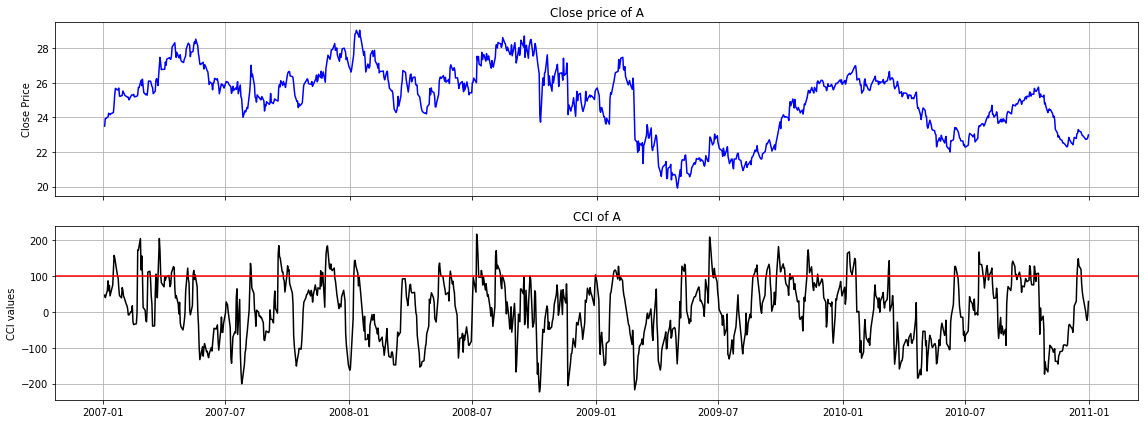

In [23]:
# Example plot of ABT Close price and Commodity Channel Index based on 20 day mvg_avg
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,1,1).set_xticklabels([])
stock_data=all_stock_data[0]
plt.plot(stock_data['Close'], color='blue')
plt.title('Close price of {}'.format(all_data_pivoting.columns[0]))
plt.ylabel('Close Price')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(CCI_data[0], color='black')
plt.axhline(y=100, color='r')
plt.title('CCI of {}'.format(all_data_pivoting.columns[0]))
plt.ylabel('CCI values')
plt.grid(True)

plt.tight_layout()

# By CCI plot below, stock is oversold most of time as avg_price remains below
# 100 benchmark(red line) for most periods

<Figure size 432x288 with 0 Axes>

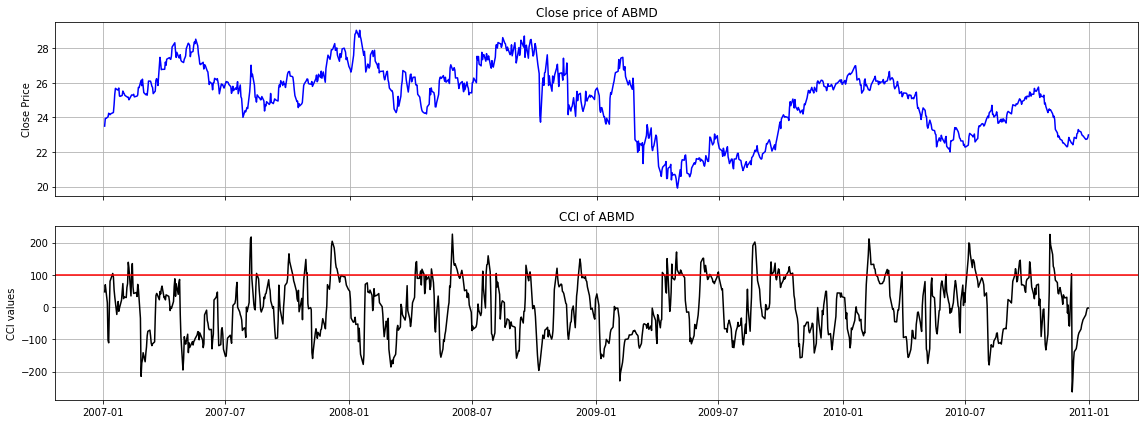

In [24]:
# Example plot of ABMD Close price and Commodity Channel Index based on 20 day mvg_avg
plt.clf()
plt.figure(figsize=(16,6))
plt.subplot(2,1,1).set_xticklabels([])
stock_data=all_stock_data[0]
plt.plot(stock_data['Close'], color='blue')
plt.title('Close price of {}'.format(all_data_pivoting.columns[1]))
plt.ylabel('Close Price')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(CCI_data[1], color='black')
plt.axhline(y=100, color='r')
plt.title('CCI of {}'.format(all_data_pivoting.columns[1]))
plt.ylabel('CCI values')
plt.grid(True)

plt.tight_layout()

# By CCI plot below, stock is oversold most of time as avg_price remains below
# 100 benchmark(red line) for most periods